In [1]:
import ROOT
import uproot as ur
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
datapath = Path("/Users/dzenger/FCFD/data/out_run41.root")
data = ur.open(datapath)

In [4]:
data["pulse"].keys()

['i_evt',
 'channel',
 'time',
 'baseline',
 'baseline_RMS',
 'noise',
 'amp',
 't_peak',
 'integral',
 'intfull',
 'risetime',
 'decaytime',
 'LP2_5',
 'LP2_10',
 'LP2_15',
 'LP2_20',
 'LP2_25',
 'LP2_30',
 'LP2_35',
 'LP2_40',
 'LP2_50',
 'LP2_60',
 'LP2_70',
 'LP2_80',
 'LP2_30mV',
 'gaus_mean',
 'gaus_sigma',
 'gaus_chi2',
 'timeoffsets']

In [5]:
channel = data["pulse"]["channel"].array(library="np")

In [6]:
channel.shape

(200, 7, 20002)

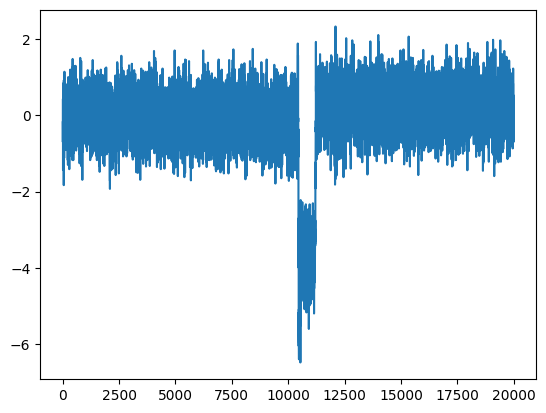

In [7]:
plt.plot(channel[0, 1, :])

In [8]:
amp = data["pulse"]["amp"].array(library="np")

In [9]:
amp.shape

(200, 7)

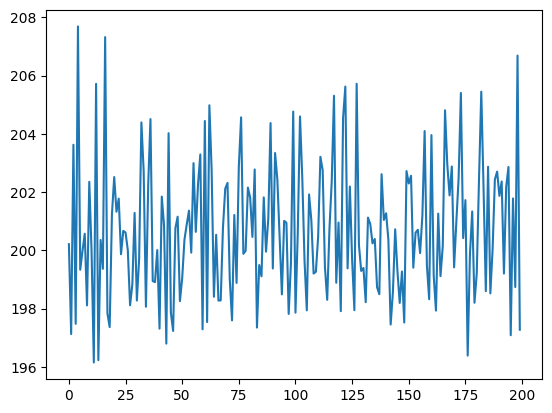

In [10]:
plt.plot(amp[:, 4])

In [11]:
cut = amp[:, 4] > 200
cut

array([ True, False,  True, False,  True, False, False,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True, False, False,  True,  True, False,  True,
        True, False, False,  True, False,  True,  True, False,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True, False, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False,  True,  True,
        True,  True, False, False, False,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True,  True,  True, False, False,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
        True, False,  True, False,  True,  True, False,  True, False,
       False,  True,

In [13]:
surviving_channel = channel[cut, :, :]

In [14]:
surviving_channel.shape

(115, 7, 20002)

In [15]:
lp2_50 =  data["pulse"]['LP2_50'].array(library="np")

In [18]:
lp2_50.shape

(200, 7)

In [17]:
lp2_50 *=1e9
lp2_50

array([[4.1123337e-01, 4.5548832e+01, 4.1037216e+01, ..., 3.9176418e+01,
        4.4142727e+01, 3.9179737e+01],
       [4.0848199e-01, 0.0000000e+00, 4.0934170e+01, ..., 3.8918041e+01,
        0.0000000e+00, 0.0000000e+00],
       [3.9738047e-01, 0.0000000e+00, 0.0000000e+00, ..., 3.9096180e+01,
        4.4182037e+01, 3.9242168e+01],
       ...,
       [4.0307114e-01, 0.0000000e+00, 0.0000000e+00, ..., 3.9024235e+01,
        0.0000000e+00, 0.0000000e+00],
       [4.1637924e-01, 2.1196538e+02, 2.0709445e+02, ..., 3.9140640e+01,
        6.1830426e+02, 3.9333405e+01],
       [4.0831009e-01, 0.0000000e+00, 0.0000000e+00, ..., 3.9208450e+01,
        0.0000000e+00, 0.0000000e+00]], shape=(200, 7), dtype=float32)

In [39]:
amp[:, 3]

array([ 8.730083 ,  5.842641 ,  6.4023137,  6.7678094,  9.076193 ,
        6.3219967,  6.324977 ,  7.9770985,  6.2831044,  8.759395 ,
        6.107688 ,  7.4064584,  6.9379807,  9.668261 ,  6.9691687,
        5.6411924,  6.539032 ,  6.41571  ,  7.3431435,  8.497089 ,
       11.981085 ,  6.53027  ,  6.7907276,  5.717188 ,  7.8778563,
        8.617536 ,  9.576008 ,  9.160787 ,  9.94429  ,  7.2102995,
        6.3322186,  7.417187 ,  6.2686057,  7.318452 ,  6.24381  ,
        8.435443 ,  9.302184 , 10.087207 , 13.215527 ,  6.502777 ,
        6.058365 , 12.499973 ,  9.507477 ,  8.391515 ,  6.8316164,
        6.3743296,  7.0508122,  6.241992 ,  7.4133425,  5.5410266,
        6.7461877,  9.417698 , 10.779142 ,  8.845702 , 10.508403 ,
        5.519062 ,  6.6302867,  6.5891595, 15.026137 ,  6.8016796,
        7.0753245,  8.623377 ,  6.2271953, 10.659724 ,  7.306829 ,
        6.7018566,  6.7802963,  5.932167 ,  7.029116 ,  6.8157616,
        6.4732733,  6.4734516,  9.489104 ,  6.4483433,  5.8287

In [48]:
cut = amp[:, 3] < 7

In [49]:
dt = -(lp2_50[cut,0] - lp2_50[cut,4])

In [23]:
dt

array([38.765186, 38.50956 , 38.6988  , 38.527176, 38.703667, 38.667507,
       38.687195, 38.59816 , 38.771587, 38.767246, 38.60039 , 38.802864,
       38.79857 , 38.75271 , 38.80516 , 38.662373, 38.597927, 38.770016,
       38.68539 , 38.679043, 38.63627 , 38.65905 , 38.606743, 38.49668 ,
       38.65594 , 38.726997, 38.723392, 38.60885 , 38.7044  , 38.766476,
       38.6762  , 38.506763, 38.766785, 38.61419 , 38.72443 , 38.73207 ,
       38.655125, 38.632015, 38.587505, 38.651466, 38.609726, 38.848972,
       38.700382, 38.537426, 38.73892 , 38.650112, 38.46762 , 38.716034,
       38.698116, 38.698784, 38.791656, 38.673534, 38.71034 , 38.586845,
       38.602043, 38.712852, 38.645607, 38.67881 , 38.612755, 38.745132,
       38.624798, 38.65486 , 38.724663, 38.725582, 38.654762, 38.8248  ,
       38.418324, 38.675297, 38.697536, 38.7297  , 38.594604, 38.47033 ,
       38.711395, 38.709248, 38.669724, 38.62703 , 38.713654, 38.766895,
       38.743027, 38.783417, 38.638226, 38.59074 , 

In [50]:
h1 = ROOT.TH1F("h3", "h1", 50, 38, 40)

for i in range(dt.shape[0]):
    h1.Fill(dt[i])

Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).


In [29]:
%jsroot on

In [51]:
c1 = ROOT.TCanvas()
h1.Draw()
c1.Draw()

In [52]:
h1.Fit("gaus")
ROOT.gStyle.SetOptFit(1001)
h1.Draw()
c1.Draw()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      6.61208
NDf                       =            8
Edm                       =  2.46901e-06
NCalls                    =           74
Constant                  =      20.4671   +/-   3.00113     
Mean                      =      38.6948   +/-   0.00791532  
Sigma                     =    0.0701748   +/-   0.00787635   	 (limited)
